In [225]:
!pip install ephem

In [226]:
import ephem

In [294]:
def sun_constelation(date):
    sun = ephem.Sun()
    sun.compute(date, epoch='1875')
    const =  ephem.constellation(sun)
    return const, sun

def moon_constelation(date):
    moon = ephem.Moon()
    moon.compute(date, epoch='1875')
    const =  ephem.constellation(moon)
    print(moon.ra, moon.dec)
    return const, moon


In [330]:
from datetime import datetime
date = datetime.today().strftime('%Y/%m/%d')


In [228]:
import pandas
from datetime import date, timedelta

sdate = date(2021,1,1)   # start date
edate = date(2021,12,30)   # end date
datelist = pandas.date_range(sdate,edate-timedelta(days=1),freq='d').to_list()
datelist = [str(x)[:10].replace("-","/") for x in datelist]

In [229]:
datelist[100]

'2021/04/11'

In [230]:
sun = ephem.Sun()
sun.compute(datelist[100], epoch='1875')
ephem.constellation(sun)

('Psc', 'Pisces')

In [231]:
dec = []
ra = []
for x in datelist:
    _, sun = sun_constelation(x)
    dec.append(sun.dec)
    ra.append(sun.ra)

    #print("sun ra : ",sun.ra, " sun dec: ", sun.dec)
    #print(_)

In [232]:
dec[0]

-0.4014123009032066

In [233]:
import math
math.degrees(6)

343.77467707849394

In [234]:
def deg2HMS(ra=''):
  RA, rs = '', ''

  if str(ra)[0] == '-':
    rs, ra = '-', abs(ra)
  raH = int(ra/15)
  raM = int(((ra/15)-raH)*60)

  raS = ((((ra/15)-raH)*60)-raM)*60

  RA = '{0}{1}:{2}:{3}'.format(rs, raH, raM, raS)

  return RA


In [235]:
deg2HMS(344.7)

'22:58:48.000000000001535'

In [236]:
dec_moon = []
ra_moon = []
for x in datelist:
    _, moon = moon_constelation(x)
    dec_moon.append(moon.dec)
    ra_moon.append(moon.ra)

    #print("sun ra : ",sun.ra, " sun dec: ", sun.dec)
    #print(_)

In [237]:
import json

def load_json(path):
    # Opening JSON file
    f = open(path)
    
    # returns JSON object as
    # a dictionary
    data = json.load(f)

    # Closing file
    f.close()
    return data


In [238]:
 stars = load_json("brightest.json")


In [239]:
stars

{'Ari': {'name': 'Hamal', 'ra': '02:07:10.40570', 'dec': '23:27:44.7032'},
 'Tau': {'name': 'Aldebaran', 'ra': '04:35:55.23907', 'dec': '16:30:44.4885'},
 'Gem': {'name': 'Pollux', 'ra': '07:45:18.94987', 'dec': '28:01:34.3160'},
 'Cnc': {'name': 'Altarf', 'ra': '08:16:30.9206', 'dec': '09:11:07.961'},
 'Leo': {'name': 'Regulus', 'ra': '10:08:22.311', 'dec': '11:58:01.95'},
 'Vir': {'name': 'Spica', 'ra': '13:25:11.579', 'dec': '-11:09:40.75'},
 'Lib': {'name': 'Zubeneschamali',
  'ra': '15:17:00.41382',
  'dec': '-09:22:58.4919'},
 'Sco': {'name': 'Antares', 'ra': '16:29:24.45970', 'dec': '-26:25:55.2094'},
 'Sgr': {'name': 'Kaus Australis',
  'ra': '18:24:10.31840',
  'dec': '-34:23:04.6193'},
 'Cap': {'name': 'Deneb Algedi',
  'ra': '21:47:02.44424',
  'dec': '-16:07:38.2335'},
 'Aqr': {'name': 'Sadalmelik',
  'ra': '22:05:47.03593',
  'dec': '-00:19:11.4568'},
 'Psc': {'name': 'Eta Piscium',
  'ra': '01:31:29.01026',
  'dec': '15:20:44.9685'}}

In [240]:
def convert_to_fixedbody(star_json):
    stars_body = {}
    for x in star_json:
        st = ephem.FixedBody()
        st._ra = ephem.hours(star_json[x]["ra"])
        st._dec = ephem.degrees(star_json[x]["dec"])
        st.compute(epoch='1875')

        stars_body[x] = {"name":star_json[x]["name"], 
                        "star body": st}


    return stars_body

In [241]:
stars_body = convert_to_fixedbody(stars)

In [242]:
for x in stars_body:
    print(x)

Ari
Tau
Gem
Cnc
Leo
Vir
Lib
Sco
Sgr
Cap
Aqr
Psc


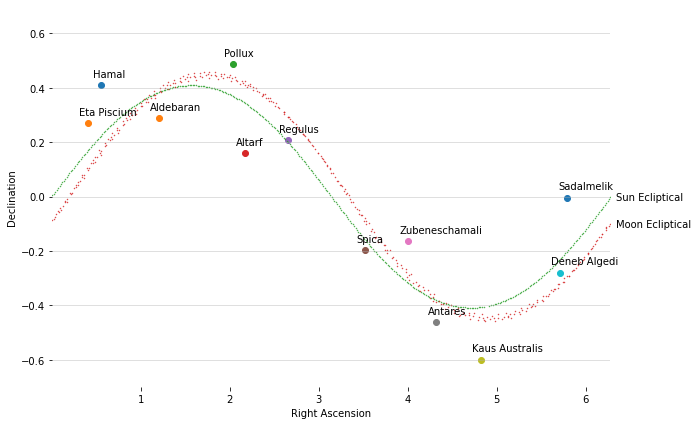

In [243]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10, 7))

ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(False)  

# Ensure that the axis ticks only show up on the bottom and left of the plot.  
# Ticks on the right and top of the plot are generally unnecessary chartjunk.  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  

ax.yaxis.grid(alpha=0.5)

for x in stars_body:
    plt.scatter(stars_body[x]["star body"].ra, stars_body[x]["star body"].dec)
    plt.annotate(stars_body[x]["name"], (stars_body[x]["star body"].ra-0.1, stars_body[x]["star body"].dec+0.03))

plt.scatter(ra, dec, s=0.2, label="Sun Ecliptical")
plt.annotate(xy=(max(ra),dec[np.argmax(ra)]), xytext=(6,0), textcoords='offset points',
                                            text="Sun Ecliptical", va='center')

plt.scatter(ra_moon, dec_moon, s=0.2, label="Moon Ecliptical")
plt.annotate(xy=(max(ra_moon),dec_moon[np.argmax(ra_moon)]), xytext=(6,0), textcoords='offset points',
                                            text="Moon Ecliptical", va='center')

plt.ylim([-0.7, 0.7])
plt.xlim(min(ra), max(ra))

plt.xlabel('Right Ascension')
plt.ylabel("Declination")

plt.savefig("eh.png")
plt.show()

In [244]:
sun_constelation(datelist[0])

(('Sgr', 'Sagittarius'), <Sun "Sun" at 0x00000166DEAD2680>)

In [245]:
sun = ephem.Sun()
sun.compute('2021/04/14', epoch='1875')


In [246]:
ephem.Ecliptic(sun).lon

0.38811987093735717

In [247]:
ephem.constellation(sun)

('Psc', 'Pisces')

In [315]:
todaysdate = "2021/12/24"
sun_const, sun = sun_constelation(todaysdate)

In [316]:
sun_const

('Sgr', 'Sagittarius')

In [317]:
sun.ra

4.757591736919506

In [318]:
sun_const = replace_ophiuchus(stars_body, sun_const)

The constellation is  Sagittarius
the star is:  Kaus Australis


In [319]:
sun_const_bright = stars_body[const[0]]["star body"]

In [320]:
sun_dist = ephem.separation(sun, bright_star)

In [321]:
sun_dist = float(sun_dist)*100

In [323]:
sun_dist

19.98320522434759

In [322]:
todaysdate = "2021/12/24"
moon_const, moon = moon_constelation(todaysdate)

9:58:51.26 17:51:10.5


In [296]:
moon_const

('Leo', 'Leo')

In [272]:
def replace_ophiuchus(stars_body, target_constellation):
    try:
        stars_body[target_constellation[0]]
        print("The constellation is ", target_constellation[1])
    except:
        print("We think the constellation is ", target_constellation[1])
        target_constellation = ("Sco", "Scorpio")

    print("the star is: ", stars_body[target_constellation[0]]["name"])
    return target_constellation

In [305]:
moon_const = replace_ophiuchus(stars_body, moon_const)

The constellation is  Leo
the star is:  Regulus


In [306]:
moon.ra

2.6129952621569217

In [307]:
moon_const_bright = stars_body[moon_const[0]]["star body"]

In [308]:
moon_dist = ephem.separation(moon, moon_const_bright)

In [309]:
moon_dist = float(moon_dist)*100

In [310]:
moon_dist

11.389470606411042

In [311]:
value = moon_dist * sun_dist

In [312]:
def normaliser(value):
    if value > 10000:
        while value > 10000:
            value *= 0.75
    elif value < 1:
        while value < 1:
            value *= 10

    value = int(value)
    return value

In [313]:
value = normaliser(value)

In [314]:
print(value)

223


In [324]:
values = []
for x in datelist:
    sun_const, sun = sun_constelation(x)
    moon_const, moon = moon_constelation(x)

    sun_const = replace_ophiuchus(stars_body, sun_const)
    moon_const = replace_ophiuchus(stars_body, moon_const)

    sun_const_bright = stars_body[const[0]]["star body"]
    moon_const_bright = stars_body[moon_const[0]]["star body"]

    moon_dist = ephem.separation(moon, moon_const_bright)
    moon_dist = float(moon_dist)*100

    sun_dist = ephem.separation(sun, sun_const_bright)
    sun_dist = float(sun_dist)*100

    value = moon_dist * sun_dist
    value = normaliser(value)

    values.append(value)

8:23:36.72 23:01:21.1
The constellation is  Sagittarius
the star is:  Kaus Australis
The constellation is  Cancer
the star is:  Altarf
9:19:01.24 20:12:54.7
The constellation is  Sagittarius
the star is:  Kaus Australis
The constellation is  Cancer
the star is:  Altarf
10:12:53.22 16:18:14.6
The constellation is  Sagittarius
the star is:  Kaus Australis
The constellation is  Leo
the star is:  Regulus
11:05:08.11 11:30:29.7
The constellation is  Sagittarius
the star is:  Kaus Australis
The constellation is  Leo
the star is:  Regulus
11:56:11.23 6:04:46.4
The constellation is  Sagittarius
the star is:  Kaus Australis
The constellation is  Virgo
the star is:  Spica
12:46:49.10 0:17:09.3
The constellation is  Sagittarius
the star is:  Kaus Australis
The constellation is  Virgo
the star is:  Spica
13:38:00.09 -5:35:22.4
The constellation is  Sagittarius
the star is:  Kaus Australis
The constellation is  Virgo
the star is:  Spica
14:30:45.42 -11:14:25.2
The constellation is  Sagittarius
the 

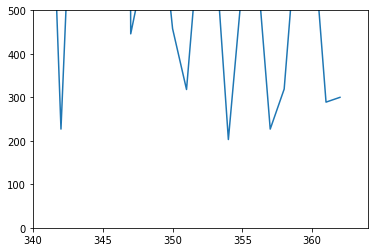

In [327]:
plt.plot(range(len(datelist)), values)
plt.xlim([340,364])
plt.ylim([0,500])
plt.show()